In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


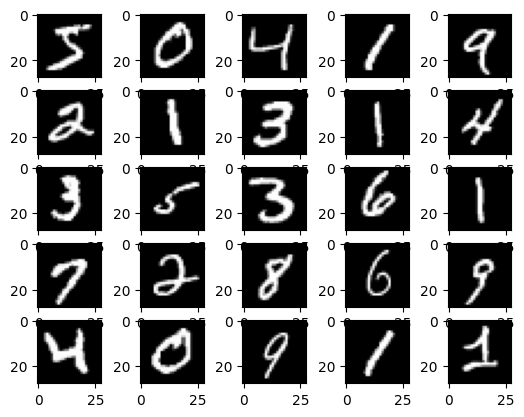

In [28]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))
# plot first few images
for i in range(25):
	# define subplot
	plt.subplot(5,5,i+1)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [29]:
# Scale the data so that the values are from 0 - 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
# convert the 2-d matrix to a 1-d array
#X_train = X_train.reshape(-1,28,28)    #training set
#X_test = X_test.reshape(-1,28,28)      #test set

In [31]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
from keras import layers
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 62s 32ms/step - loss: 0.2141 - accuracy: 0.9329
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0713 - accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0520 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0320 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0150 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 59s 31m

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [35]:
model.evaluate(X_test, Y_test)


313/313 [==============================] - 4s 13ms/step - loss: 0.0498 - accuracy: 0.9876


[0.04980125278234482, 0.9876000285148621]

# **Make the predictions**

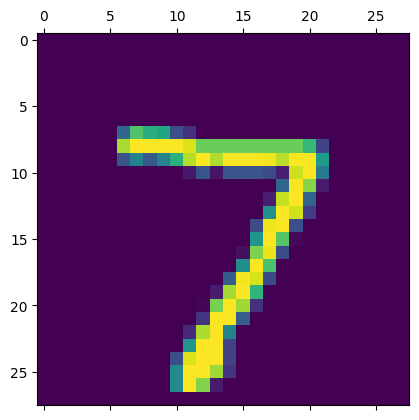

In [36]:
# Show the image
plt.matshow(X_test[0])

In [37]:
# Make the predictions
Y_predicted = model.predict(X_test)
Y_predicted[0]

313/313 [==============================] - 3s 9ms/step


array([5.7016731e-08, 1.6722755e-05, 2.8527053e-05, 2.1835394e-05,
       8.5904679e-07, 3.2754887e-08, 1.8749932e-13, 9.9993044e-01,
       3.6981092e-07, 1.0516543e-06], dtype=float32)

In [38]:
# Find the maximum value using numpy
np.argmax(Y_predicted[0])

7

# ***Using confusion matrix for Using validation***

In [39]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    0,    1,    0,    1,    4,    0,    1],
       [   0, 1124,    2,    1,    3,    2,    1,    2,    0,    0],
       [   2,    0, 1023,    0,    0,    0,    0,    7,    0,    0],
       [   0,    0,    3, 1001,    0,    4,    0,    1,    1,    0],
       [   0,    0,    1,    0,  980,    0,    0,    0,    0,    1],
       [   3,    0,    1,    5,    0,  872,    5,    1,    5,    0],
       [   2,    3,    1,    0,    2,    1,  946,    0,    3,    0],
       [   1,    2,   17,    1,    0,    1,    0, 1003,    1,    2],
       [   1,    1,    2,    0,    1,    1,    0,    0,  966,    2],
       [   1,    0,    0,    0,   12,    1,    0,    1,    4,  990]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

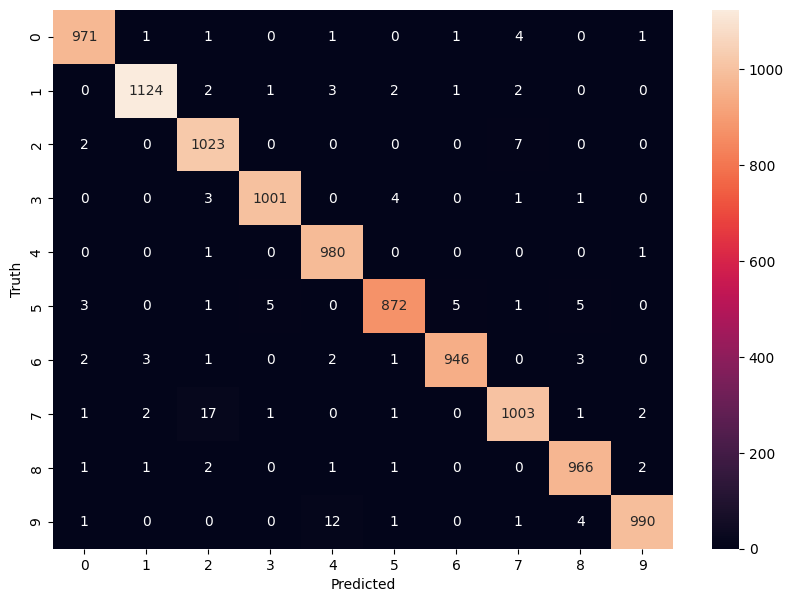

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ***Testing by loading an image***

In [49]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def load_image(filename):
  # load the image
  img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28, 1)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  return img
# predict the class
img1=load_image('/content/sample_image2_2.PNG')
img2=load_image('/content/sample_image2_1.PNG')
digit1 = np.argmax(model.predict(img1))
digit2 = np.argmax(model.predict(img2))
print(digit1,"\n",digit2)

1/1 [==============================] - 0s 24ms/step
4 
 3
